# Gold contango

We examine futures prices for gold, in particular, the contango situation. 
The futures price may be either higher or lower than the spot price. 
When the spot price is higher than the futures price, the market is said to 
be in **backwardation**. If the spot price is lower than the futures price, 
the market is in **contango**.

The futures or forward curve would typically be upward sloping, 
since contracts for further dates would typically trade at even higher prices. 
A contango is normal for a non-perishable commodity that has 
a *cost of carry*. Such costs include warehousing fees and 
interest forgone on money tied up, 
less income from leasing out the commodity if possible (e.g. gold). 

Our study examines a segment of the futures curve, specifically the 
nearby contract versus another dated six months thereafter, 
for gold traded on the COMEX exchange. We use the expected 
LIBOR interest rate for the identical segment to adjust the 
cost of carry. We then compare this supply/demand indicator against spot prices. 

The *London Bullion Market Association* ceased publishing daily data 
on their *Gold Forward Offered Rate* (**GOFO**), as of 30 January 2015 -- 
so we develop an observable proxy called *tango*.  


*Dependencies:*

    - Linux, bash [not critical, generally cross-platform]
    - Python: matplotlib, pandas [recommend Anaconda distribution]
    - Modules: fecon
     
*CHANGE LOG*

    2015-10-11  Code review.
    2015-09-11  First version.

In [1]:
#  NOTEBOOK v4 settings and system details:      [00-tpl v4.15.0812]

#  Assume that the backend is LINUX (e.g. Ubuntu running bash shell):
print '\n ::  TIMESTAMP of last notebook execution:'
!date
print ' ::  IPython version:'
!ipython --version

#  Automatically RELOAD modified modules:
%load_ext autoreload
%autoreload 2
#           0 disables autoreload.

#  DISPLAY options
from IPython.display import Image 
#  e.g. Image(filename='holt-winters-equations.png', embed=True) # url= also works
from IPython.display import YouTubeVideo
#  e.g. YouTubeVideo('1j_HxD4iLn8', start='43', width=600, height=400)
from IPython.display import HTML # useful for snippets
#  e.g. HTML('<iframe src=http://en.mobile.wikipedia.org/?useformat=mobile width=700 height=350></iframe>')
from IPython.core import page
get_ipython().set_hook('show_in_pager', page.as_hook(page.display_page), 0)
#  Or equivalently in config file: "InteractiveShell.display_page = True", 
#  which will display results in secondary notebook pager frame in a cell.

#  MATH display, use %%latex, rather than the following:
#                from IPython.display import Math
#                from IPython.display import Latex
#  Generate PLOTS inside notebook:
%matplotlib inline

import pandas as pd
print ' ::  pandas version:'
print pd.__version__
#      pandas DataFrames are represented as text by default; enable HTML representation:
#      [Deprecated: pd.core.format.set_printoptions( notebook_repr_html=True ) ]
pd.set_option( 'display.notebook_repr_html', False )

print ' ::  Working directory (set as $workd):'
workd, = !pwd
print workd + '\n'


 ::  TIMESTAMP of last notebook execution:
Sun Oct 11 10:18:42 PDT 2015
 ::  IPython version:
3.2.1
 ::  pandas version:
0.16.2
 ::  Working directory (set as $workd):
/home/yaya/Dropbox/share/git/nous/fecon235/nb



In [2]:
from fecon import *

In [3]:
#  SET UP the particular (f4) futures contracts of interest:
s_libor = 'f4libor15z'
s_xau1  = 'f4xau15z'
s_xau2  = 'f4xau16m'

#  f4libor* refers to the CME Eurodollar futures.

#  The second nearby contract for gold (xau)
#  should be 6 months after the first using the 
#  June (m) and December (z) cycle

#  RE-RUN this entire study by merely changing the string symbols.

In [4]:
#  Retrieve data:
libor = todf( 100 - get(s_libor) )
#             ^convert quotes to conventional % format
xau1 = get(s_xau1)
xau2 = get(s_xau2)

In [5]:
tail(libor)

                Y
Date             
2015-10-01  0.415
2015-10-02  0.380
2015-10-05  0.390
2015-10-06  0.385
2015-10-07  0.395
2015-10-08  0.390
2015-10-09  0.390

In [6]:
tail(xau1)

                 Y
Date              
2015-10-01  1113.7
2015-10-02  1136.6
2015-10-05  1137.6
2015-10-06  1146.4
2015-10-07  1148.7
2015-10-08  1144.3
2015-10-09  1155.9

In [7]:
tail(xau2)

                 Y
Date              
2015-10-01  1115.9
2015-10-02  1138.6
2015-10-05  1139.7
2015-10-06  1148.4
2015-10-07  1150.7
2015-10-08  1146.3
2015-10-09  1158.0

Usually contango is described in price unit terms, however, we prefer the scale-free annualized percentage format. This places the measure on par with the way interest rates are usually quoted.

In [8]:
#  Compute the contango in terms of annualized percentage:
contango = todf( ((xau2 / xau1) - 1) * 200 )

#  Multiply by 200 instead of 100 since 
#  the gold contracts are stipulated to be six months apart.

In [9]:
tail( contango )

                   Y
Date                
2015-10-01  0.395079
2015-10-02  0.351927
2015-10-05  0.369198
2015-10-06  0.348918
2015-10-07  0.348220
2015-10-08  0.349559
2015-10-09  0.363353

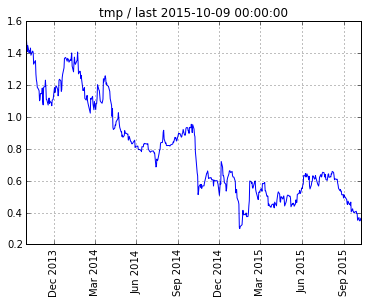

In [10]:
plot( contango )

The largest variable component to the cost-of-carry is **interest**. We filter that out by subtracting the LIBOR rate obtained from the futures on Eurodollars. We shall call the result: **tango**.

In [11]:
tango = todf( contango - libor )

In [12]:
tail( tango )

                   Y
Date                
2015-10-01 -0.019921
2015-10-02 -0.028073
2015-10-05 -0.020802
2015-10-06 -0.036082
2015-10-07 -0.046780
2015-10-08 -0.040441
2015-10-09 -0.026647

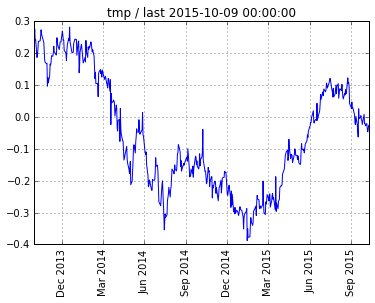

In [13]:
#  MAIN chart <- pay attention here !!
plot( tango )

In [14]:
tango.describe()

                Y
count  512.000000
mean    -0.055539
std      0.175758
min     -0.387929
25%     -0.201538
50%     -0.098203
75%      0.094842
max      0.282874

Usually *tango* has approximate mean of zero, with somewhat 
wide latitude: 2015-10-09 at 18 bp standard deviation (annualized).

Since warehousing costs for gold are fairly constant across time, 
changes in tango mainly reflect supply and demand. 
A major component of tango is the **leasing rate**. 

The *London Bullion Market Association* had published daily data 
on the *Gold Forward Offered Rate*, or **GOFO**.  These are rates 
at which LBMA members are prepared to lend gold on a swap against 
U.S. dollars. Historically there has been negative leasing rates, 
meaning that the lessors were willing to actually pay you to borrow gold from 
them [but mostly likely it is a  central bank is paying some 
bullion bank to take their gold]. 
Unfortunately, the GOFO dataset has been **discontinued** as of 30 January 2015.

In [15]:
#  For historians:
Image(url='https://www.mcoscillator.com/data/charts/weekly/GOFO_1mo_1995-2014.gif', embed=False)

## Relationship to cash prices

We now look at the current London PM gold fix series.

In [16]:
xau = get( d4xau )

In [17]:
#  This matches the futures sample size:
xau0 = tail( xau, 512 )

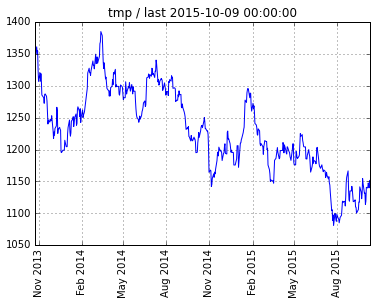

In [18]:
plot( xau0 )

In [19]:
#  Is there near-term correlation between price and tango?
#  stat2( xau0[Y], tango[Y] )
#  2015-09-11  correlation: 0.09, so NO.

In [20]:
#  Running annual percentage change in spot price:
xau0pc = tail( pcent(xau, 256), 512 )

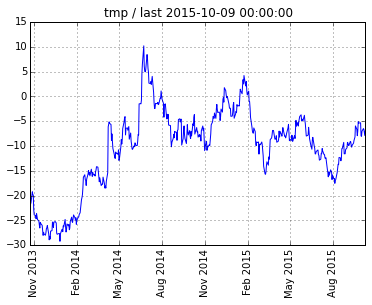

In [21]:
plot ( xau0pc )

In [22]:
#  Is there near-term correlation between price change and tango?
stat2( xau0pc[Y], tango[Y] )
#  2015-09-11  correlation: -0.85, so YES.
#  2015-10-09  correlation: -0.83

 ::  FIRST variable:
count    512.000000
mean     -10.339155
std        8.217664
min      -29.210332
25%      -15.148375
50%       -8.715890
75%       -5.237605
max       10.192953
Name: Y, dtype: float64

 ::  SECOND variable:
count    512.000000
mean      -0.055539
std        0.175758
min       -0.387929
25%       -0.201538
50%       -0.098203
75%        0.094842
max        0.282874
Name: Y, dtype: float64

 ::  CORRELATION
-0.827301833127

-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         494
Number of Degrees of Freedom:   2

R-squared:         0.6844
Adj R-squared:     0.6838

Rmse:              4.5910

F-stat (1, 492):  1067.0753, p-value:     0.0000

Degrees of Freedom: model 1, resid 492

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
------------------------------------

So roughly speaking, **increasing tango is correlated to decling prices.** Thus increasing selling pressure in the near-term versus the distant-term (which in effect widens tango) is correlated to future declines in cash prices. 

Equivalently, **decreasing tango is correlated to increasing prices.**

## Closing comments

2015-10-11  Since tango is currently near its mean value, 
it seems equally likely to decrease or increase 
(though its short-term trend is upwards), so the 
future direction of gold prices seems inconclusive.

Tango as an indicator is insightful whenever it is 
at the extremes of its expected range. Trading urgency 
is indicated at such extremes, which is subsequently 
dissipated as the gold market rebalances.